In [1]:
import pickle
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats
import os

#https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
    return m, m - h, m + h

def set_dict_entry(dictionary, keys, value):
    for key in keys[:-1]:
        dictionary = dictionary.setdefault(key, {})
    dictionary[keys[-1]] = value
    
def dict_iterator(dictionary, keys=None):
    if keys is None:
        keys = []
    for key, value in dictionary.items():
        new_keys = keys + [key]
        if isinstance(value, dict):
            for pair in dict_iterator(value, keys=new_keys):
                yield pair
        else:
            yield [new_keys, value]
            
def get_CI(dictionary):
    to_return = {}
    for val in dict_iterator(dictionary):
        utilities = val[1]
        set_dict_entry(to_return, val[0], mean_confidence_interval(utilities))
    return to_return

In [5]:
dir = 'Results/'
results = {}
for file in os.scandir(dir):
    if file.name.endswith('.p'):
        tokens = file.name[:-2].split('_')
        if "very" in tokens:
            with open(os.path.join(dir, file.name), 'rb') as input_file:
                value = pickle.load(input_file)
            set_dict_entry(results, [tokens[0], "very_"+ tokens[-1]], value)
        else:
            with open(os.path.join(dir, file.name), 'rb') as input_file:
                value = pickle.load(input_file)
            set_dict_entry(results, [tokens[0], tokens[-1]], value)
print(results)

CI_dict = get_CI(results)

print(CI_dict)

{'medium': {'320': [44.81374740600586, 29.572718620300293, 29.582540035247803, 29.636666536331177, 29.624634981155396, 29.635657787322998, 29.614075899124146, 29.5998694896698, 29.607167720794678, 29.611597776412964, 29.630499839782715, 29.61713933944702, 29.620057582855225, 29.59531044960022, 29.618177890777588, 29.62671184539795, 29.613963842391968, 29.632806301116943, 29.608543157577515, 29.638720989227295, 29.606152057647705, 29.61911129951477, 29.643990755081177, 29.611929178237915, 29.591081619262695, 29.608418226242065, 29.621509790420532, 29.616995811462402, 29.601762056350708, 29.610727787017822, 29.593928337097168, 29.649737119674683, 29.62480664253235, 29.577247858047485, 29.62623429298401, 29.627245903015137, 29.621564388275146, 29.611839056015015, 29.607632875442505, 29.61697483062744, 29.612720251083374, 29.624309062957764, 29.632453441619873, 29.6251060962677, 29.602314949035645, 29.63108777999878, 29.61680269241333, 29.625709772109985, 29.618306159973145, 29.61424589157

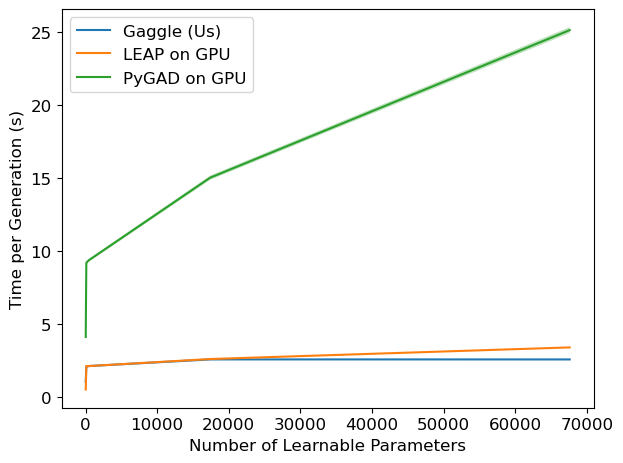

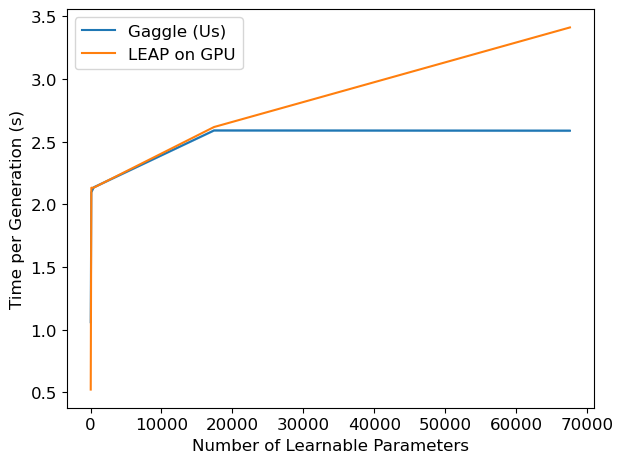

<Figure size 640x480 with 0 Axes>

In [11]:
model_sizes = ["tiny", "small", "medium", "large", "very_large"]
model_num_params = [30, 114, 450, 17410, 67590]
plt.rcParams.update({'font.size': 12})

nice_names = {'gaggle':'Gaggle (Us)', 'leap': 'LEAP on GPU', 'pygad': 'PyGAD on GPU'}

for algorithm in nice_names:
    result = CI_dict[algorithm]
    values = [result[str(x)][0] for x in model_sizes]
    lower = [result[str(x)][1] for x in model_sizes]
    upper = [result[str(x)][2] for x in model_sizes]
    plt.plot(model_num_params, values, label=nice_names[algorithm])
    plt.fill_between(model_num_params, lower, upper, alpha=0.3)
        
# plt.title("{} Dataset".format(dataset))
plt.xlabel("Number of Learnable Parameters")
plt.ylabel("Time per Generation (s)")
plt.tight_layout()
plt.legend()
plt.plot()
plt.savefig('Results/cartpole_plot.png', bbox_inches='tight')
plt.show()
plt.clf()

nice_names = {'gaggle':'Gaggle (Us)', 'leap': 'LEAP on GPU'}
for algorithm in nice_names:
    result = CI_dict[algorithm]
    values = [result[str(x)][0] for x in model_sizes]
    lower = [result[str(x)][1] for x in model_sizes]
    upper = [result[str(x)][2] for x in model_sizes]
    plt.plot(model_num_params, values, label=nice_names[algorithm])
    plt.fill_between(model_num_params, lower, upper, alpha=0.3)

# plt.title("{} Dataset".format(dataset))
plt.xlabel("Number of Learnable Parameters")
plt.ylabel("Time per Generation (s)")
plt.tight_layout()
plt.legend()
plt.plot()
plt.savefig('Results/cartpole_plot.png', bbox_inches='tight')
plt.show()
plt.clf()